In [1]:
# What version of Python do you have?
import sys
import os
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import numpy as np
import re
import mne
import pathlib
import openpyxl
from datetime import datetime
import pytz
import random
import os
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Sequential
from matplotlib import pyplot as plt
%matplotlib inline

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Init Plugin
Init Graph Optimizer
Init Kernel
Tensor Flow Version: 2.5.0
Keras Version: 2.5.0

Python 3.9.7 (default, Sep 16 2021, 23:53:23) 
[Clang 12.0.0 ]
Pandas 1.3.1
Scikit-Learn 0.24.2
GPU is available


In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.reshape(60000, 28,28, 1)
x_train.shape

(60000, 28, 28, 1)

In [5]:
x_train = x_train.astype(float)

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
x_train[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [8]:
y_train.shape

(60000,)

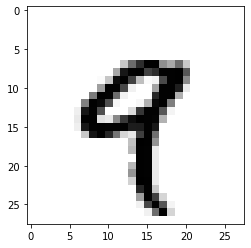

In [28]:
digit = x_train[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [9]:
y_train = y_train.astype(float)

In [50]:
from sklearn.preprocessing import LabelBinarizer

label_as_binary = LabelBinarizer()
train__y_labels = label_as_binary.fit_transform(y_train)
y_train = train__y_labels.astype(float)

In [51]:
type(train__y_labels[1][1])

numpy.int64

In [52]:
train__y_labels[1]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [53]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import models

model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 28, 28, 512)       1024      
_________________________________________________________________
flatten_2 (Flatten)          (None, 401408)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                6422544   
_________________________________________________________________
dense_8 (Dense)              (None, 10)                170       
Total params: 6,423,738
Trainable params: 6,423,738
Non-trainable params: 0
_________________________________________________________________


In [70]:
from tensorflow.keras import backend as K

def my_loss_fn(y_true, y_pred):
    K.print_tensor(y_true, message='y_true = ')
    K.print_tensor(y_pred)
    tf.print(y_true)
    K.print_tensor(y_true)
    squared_difference = tf.square(y_true - y_pred)
    K.print_tensor(squared_difference)
    K.print_tensor(tf.reduce_mean(squared_difference, axis=-1))
    return tf.reduce_mean(squared_difference, axis=-1)

In [71]:
tf.config.run_functions_eagerly(True)

In [72]:
model.compile(optimizer='adam', loss=my_loss_fn, metrics=['accuracy'], run_eagerly=True)

In [74]:
model.fit(
    x_train,
    y_train,
    epochs=1,
    batch_size=1
)

y_true =  [[0 0 0 ... 0 0 1]]
 [[0 0 0 ... 1 0 0]]
[[0 0 0 ... 0 0 1]]
 [[0 0 0 ... 0 0 1]]
 [[0 0 0 ... 1 0 1]]
 [0.2]
    1/60000 [..............................] - ETA: 10:31:59 - loss: 0.2000 - accuracy: 0.0000e+00y_true =  [[0 0 0 ... 0 0 0]]
 [[0 0 0 ... 1 0 0]]
[[0 0 0 ... 0 0 0]]
 [[0 0 0 ... 0 0 0]]
 [[0 0 0 ... 1 0 0]]
 [0.2]
    2/60000 [..............................] - ETA: 8:38:40 - loss: 0.2000 - accuracy: 0.0000e+00 y_true =  [[0 0 0 ... 0 0 0]]
 [[0 0 0 ... 1 0 0]]
[[0 0 0 ... 0 0 0]]
 [[0 0 0 ... 0 0 0]]
 [[0 0 0 ... 1 0 0]]
 [0.2]
    3/60000 [..............................] - ETA: 8:38:56 - loss: 0.2000 - accuracy: 0.0000e+00y_true =  [[0 0 0 ... 0 0 1]]


KeyboardInterrupt: 